## M. Amintoosi
## کاوش الگوهای پرتکرار
استخراج قوانین انجمنی

In [36]:
import pandas as pd
import numpy as np
# from orangecontrib.associate.fpgrowth import *
# from itertools import tee
# from tqdm import tqdm
import networkx as nx
import math 
from sklearn import preprocessing
import ml_metrics
# import recmetrics
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from pandas import DataFrame 
pd.options.display.float_format = "{:.2f}".format
from itertools import chain


df_403p = pd.read_excel(r'data/403.xlsx', engine="openpyxl") 
# df_430p = pd.read_excel(r'results/bestPlants_min_freq_10.xlsx', header=None) 
# bf_plants = list(df_430p[0])
# print (list(df_430p[0]))
# metabolitNames = df_430p.head(0).to_string()
# # df_403p.dropna(inplace=True) حذف نمی‌کنیم، چون همه سطرها حذف خواهند شد
plantNames = list(df_403p.head(0)) #df_430p.keys()#
print(df_403p.shape[0],df_403p.shape[1])
# print(len(plantNames))
df_403p.iloc[:,[0,1,2,-3,-2,-1]].head(10)

627 403


,Acacia farnesiana,Acacia seyal,Acer rubrum,Zanthoxylum zanthoxyloides,Zingiber officinale,Ziziphus jujuba
0,C00001036,C00002647,C00001411,C00001857,C00000135,C00000208
1,C00002647,C00005548,C00002647,NaN,C00000136,C00000775
2,C00005548,C00008817,C00006798,NaN,C00000805,C00000947
3,C00005872,NaN,C00030222,NaN,C00000816,C00001228
4,C00008210,NaN,C00030754,NaN,C00000819,C00001238
5,C00008817,NaN,C00038195,NaN,C00000839,C00001429
6,C00013297,NaN,NaN,NaN,C00000844,C00001434
7,C00013867,NaN,NaN,NaN,C00000845,C00001819
8,C00013974,NaN,NaN,NaN,C00000855,C00001906
9,C00014320,NaN,NaN,NaN,C00000861,C00002644


In [35]:
# df_403p.iloc[:,0].count()
plant_met_df = DataFrame(df_403p.count(axis=0),columns=['Number of Metabolites'])
# , df_403p.count(axis=1)
print(plant_met_df.max())
# تعداد گیاهان دارای یک متابولیت
print(' تعداد گیاهان دارای یک متابولیت')
print((plant_met_df['Number of Metabolites']==1).sum()) #.groupby().count())
print(plant_met_df['Number of Metabolites'].sum())
plant_met_df

Number of Metabolites    627
dtype: int64
 تعداد گیاهان دارای یک متابولیت
35
12544


,Number of Metabolites
Acacia farnesiana,11
Acacia seyal,3
Acer rubrum,6
Acer saccharum,5
Achillea millefolium,26
...,...
Zanthoxylum limonella,4
Zanthoxylum rhetsa,4
Zanthoxylum zanthoxyloides,1
Zingiber officinale,102


In [3]:
# نام و تعداد همه متابولیت‌های ۴۰۳
met_set_403 = set()
for col in df_403p:
#     print(df_403p[col].dropna().tolist())
    met_set_403.update(df_403p[col].dropna().tolist())
    
# print(met_list_403)    
# print(len(met_list_403))
# len(np.unique(met_list_403))
print('تعداد متابولیت‌های فایل ۴۰۳ به صورت غیرتکراری')
print(len(met_set_403))

# کدام متابولیت‌ها فقط در یک گیاه وجود دارند؟
# از bow استفاده می‌کنیم

7416


In [103]:
# کدام متابولیت‌ها فقط در یک گیاه وجود دارند؟

numpy_matrix = df_403p.values
d =  numpy_matrix.transpose()
T = [[x for x in row if str(x) != 'nan'] for row in d]

newlist = list(chain(*T))
print(len(np.unique(newlist)))
newlist[0]
corpus = [None] * len(T)
for i in range(len(T)):
    listToStr = ' '.join([str(elem) for elem in T[i]]) 
    corpus[i] = listToStr
print(type(corpus))
print(corpus[0])
print(len(corpus))
vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
X = vectorizer.fit_transform(corpus)
print(X.shape)
# print(X.toarray())
bow = X.toarray()
# print(sum(bow[0] & bow[2]))
featureNames = vectorizer.get_feature_names()

sum_bow = np.sum(bow,axis=0)
print(sum_bow.shape)
print('تعداد متابولیت‌هایی که فقط در یک گیاه آمده اند')
print(np.sum(sum_bow==1))
print(np.where(sum_bow==1)[0])
print(featureNames[np.argwhere(sum_bow==1)[0][0]])

print('تعداد متابولیت‌هایی که در بیش از ۲۰ گیاه آمده اند')
tmp = np.where(sum_bow>=20)[0]
print(len(tmp))
met_list = [featureNames[i] for i in tmp]
print(met_list)

sum_bow_ax1 = np.sum(bow,axis=1)
print(sum_bow_ax1.shape)
print('تعداد گیاهانی که بیش از ۱۰۰ متابولیت دارند')
tmp = np.where(sum_bow_ax1>=100)[0]
print(len(tmp))
print(df_403p.keys()[tmp].format())

7416
<class 'list'>
C00001036 C00002647 C00005548 C00005872 C00008210 C00008817 C00013297 C00013867 C00013974 C00014320 C00046784
403
(403, 7416)
(7416,)
تعداد متابولیت‌هایی که فقط در یک گیاه آمده اند
5437
[   4   16   17 ... 7412 7414 7415]
c00000007
تعداد متابولیت‌هایی که در بیش از ۲۰ گیاه آمده اند
24
['c00000001', 'c00000615', 'c00000674', 'c00000805', 'c00001429', 'c00001434', 'c00001435', 'c00002499', 'c00002631', 'c00002647', 'c00002724', 'c00002743', 'c00003672', 'c00003674', 'c00003817', 'c00004565', 'c00005373', 'c00005374', 'c00005413', 'c00019064', 'c00019308', 'c00046784', 'c00051985', 'c00052006']
(403,)
تعداد گیاهانی که بیش از ۱۰۰ متابولیت دارند
20
['Alpinia sp.', 'Arabidopsis thaliana', 'Artemisia annua', 'Artemisia biennis', 'Artemisia sieberi', 'Berberis orthobotrys', 'Camellia sinensis', 'Citrus reticulata', 'Dioscorea birmanica', 'Dioscorea membranacea', 'Glycine max', 'Glycyrrhiza glabra', 'Glycyrrhiza uralensis', 'Inula lineariifolia', 'Millettia macrophylla', 'Mor

In [112]:
# درجه گیاه زیر که در جدول ۳-۵ برابر ۱۴ ذکر شده،‌اگه منظور تعداد متابولیتاش باشه، همخوان نیست
print(df_403p.keys()[tmp[15]])
sum(bow[15,:])

Morus alba


22

In [117]:
print('تعداد گیاهانی که دارای متابولیت‌ شماره ۳۶۷۲ هستند ۶۱ تاست اما درجه آن در جدول ۳-۶ برابر ۳۸ ذکر شده')
tmp = np.where(sum_bow>=20)[0]
met_list = [featureNames[i] for i in tmp]
print(met_list[12])
print(sum(bow[:,tmp[12]]))

تعداد گیاهانی که دارای متابولیت‌ شماره ۳۶۷۲ هستند ۶۱ تاست اما درجه آن در جدول ۳-۶ برابر ۳۸ ذکر شده
c00003672
61


In [121]:
ac_df = pd.read_excel(r'data/AC complete network 27-06-98 .xlsx', engine="openpyxl",sheet_name=0)
print(ac_df.shape[0],ac_df.shape[1])
# ac_df.iloc[:,[0,2]].head(10)
print(ac_df.shape[0])
ac_df = ac_df.drop(columns=['interaction'])
ac_df.dropna(inplace = True)
print(ac_df.shape[0])
len(ac_df['Speciea'].unique())

23540 3
23540
5392


3251

In [5]:
# خواندن و چک کردن درستی ۶۶۷ متابولیت
ac_df_668 = pd.read_excel(r'data/AC complete network 27-06-98 .xlsx', engine="openpyxl",sheet_name=1)
# ac_df = ac_df.drop(columns=['interaction'])
# ac_df.head()
# ac_df.groupby('Metabolit').count().sort_values(by='Speciea',ascending=False)
# print(len(ac_df_668))
# ac_df.dropna(inplace=True)
# print(len(ac_df_668))
# len(set(ac_df_668) and set(ac_df['Metabolit'].unique()))
m667 = ac_df_668['AC_Metabolites'].values
# m667
print(len(m667))
ac_df_668

667


,AC_Metabolites
0,C00000113
1,C00000152
2,C00000258
3,C00000269
4,C00000270
...,...
662,C00051634
663,C00051635
664,C00051636
665,C00051637


In [6]:
numpy_matrix = df_403p.values
d =  numpy_matrix.transpose()
T = [[x for x in row if str(x) != 'nan'] for row in d]
# T = [[str(i)[3:] for i in row ] for row in d]
# T = [[int(i) for i in row if i != ''] for row in T]
# print(len(T))
# print(set(T[0][:20]) and m667 )
n_plants = len(T)
n_plants

403

In [7]:
df_403p_interscted_met =  pd.DataFrame().reindex_like(df_403p)
# df_403p_interscted_met

In [24]:
LR_all_met = set()
LR_intersected_met = set()
df_403p_interscted_met =  pd.DataFrame().reindex_like(df_403p)
for col in df_403p:
    nan_list = list(np.full(df_403p.shape[0], np.nan))
    # print(df_403p[col])
    intersect_set = set(df_403p[col]) & set(m667)
    # intersect_set.remove(np.nan)
    LR_intersected_met.update(intersect_set)
    intersect = list(intersect_set)
    nan_list[:len(intersect)] = intersect
    df_403p_interscted_met[col] = nan_list
    LR_all_met.update(set(df_403p[col]))

# df_403p_interscted_met
LR_all_met.remove(np.nan)
print(len(LR_intersected_met))
print(len(LR_all_met))
# LR_all_met

324
7416


In [9]:
df_403p_interscted_met.iloc[:,[0,1,2,-3,-2,-1]].head(10)

,Acacia farnesiana,Acacia seyal,Acer rubrum,Zanthoxylum zanthoxyloides,Zingiber officinale,Ziziphus jujuba
0,C00002647,C00002647,C00030222,C00001857,C00010868,C00002743
1,NaN,NaN,C00002647,NaN,C00000845,C00001819
2,NaN,NaN,NaN,NaN,C00002748,C00001228
3,NaN,NaN,NaN,NaN,NaN,C00001238
4,NaN,NaN,NaN,NaN,NaN,C00003741
5,NaN,NaN,NaN,NaN,NaN,C00003740
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_403p_interscted_met.count()
df_403p_interscted_met_count = DataFrame(df_403p_interscted_met.count(),columns =['met_count'])
print(df_403p_interscted_met_count)
print(df_403p_interscted_met_count[df_403p_interscted_met_count['met_count']>20])

                            met_count
Acacia farnesiana                   1
Acacia seyal                        1
Acer rubrum                         2
Acer saccharum                      1
Achillea millefolium                7
...                               ...
Zanthoxylum limonella               0
Zanthoxylum rhetsa                  0
Zanthoxylum zanthoxyloides          1
Zingiber officinale                 3
Ziziphus jujuba                     6

[403 rows x 1 columns]
                      met_count
Arabidopsis thaliana         58
Artemisia biennis            26
Artemisia sieberi            26


In [55]:
# نمایش نمودار فراوانی تعداد متابولیت های مشترک
ser = df_403p_interscted_met.count()
# ser.values
met_counts = ser.value_counts()
# .agg('sum')
print(met_counts)
print(met_counts.values)
# plt.bar(met_counts.index,met_counts.values)
# print(ser[ser.values<2])
print(met_counts[1:].sum()) # تعداد متابولیت مشترک 
# print(sum(int(met_counts.index.format()[1:]))) # تعداد گیاهانی که با ای سی متابولیت مشترک دارند
print(met_counts.sum())
# print(met_counts.index)

0     141
1      64
3      43
2      39
4      28
5      20
7      15
6      15
8      12
9       7
10      6
11      5
26      2
14      2
12      1
16      1
18      1
58      1
dtype: int64
[141  64  43  39  28  20  15  15  12   7   6   5   2   2   1   1   1   1]
262
403


گیاهان مشترک


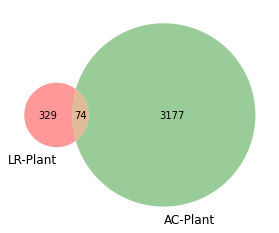

In [27]:
from matplotlib_venn import venn2, venn2_circles

# figure, axes = plt.subplots(1, 2)
# venn2([set(df_403p.keys().format()) , set(ac_df['Speciea'].unique())], set_labels=('LR','AC'),ax=axes[0])
venn2([set(df_403p.keys().format()) , set(ac_df['Speciea'].unique())], set_labels=('LR-Plant','AC-Plant'))
print('گیاهان مشترک')
# print(set(df_403p.keys().format()) & set(ac_df['Speciea'].unique()))
plt.show()

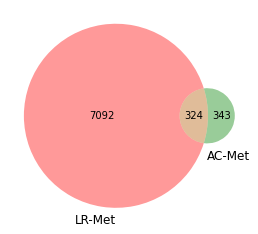

In [28]:
venn2([LR_all_met , set(ac_df['Metabolit'].unique())], set_labels=('LR-Met','AC-Met'))
plt.show()

In [135]:
len(df_403p_interscted_met_count['met_count'])
i=1
print(met_counts.values[i])
idx = df_403p_interscted_met_count[df_403p_interscted_met_count['met_count']==14]
print(idx)
name = idx.index.format()
print(name[0]+"\n"+name[1])
print(met_counts.sort_index(ascending=True).values)
print(met_counts.sort_index(ascending=True).index.values)

64
                 met_count
Annona muricata         14
Morus alba              14
Annona muricata
Morus alba
[141  64  39  43  28  20  15  15  12   7   6   5   1   2   1   1   2   1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 16 18 26 58]


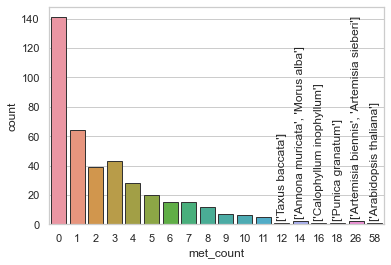

In [141]:
import seaborn as sns
sns.set(style="whitegrid")#"darkgrid")
total = float(len(met_counts)) # one person per row 
ax = sns.countplot(x=df_403p_interscted_met_count['met_count'],\
                   edgecolor=".2",data=df_403p_interscted_met_count ) # for Seaborn version 0.7 and more
met_counts_sorted_index = met_counts.sort_index(ascending=True).values
met_counts_sorted_vals = met_counts.sort_index(ascending=True).index.values
for i,p in enumerate(ax.patches):
    if(met_counts_sorted_index[i]<3):
#         print(p.get_x(),i,met_counts_sorted_index[i],met_counts_sorted_vals[i])
        idx = df_403p_interscted_met_count[df_403p_interscted_met_count['met_count']==met_counts_sorted_vals[i]]
        name = idx.index.format()
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3, name,
            ha="center",rotation =90) 
plt.show()

In [9]:
# مشخص کردن گیاهانی که هیچ متابولیت مشترکی با لیست ای‌سی ندارند و  حذف آنها
null_cols = df_403p_interscted_met.columns[df_403p_interscted_met.isnull().all()]
# null_cols

In [ ]:
df_403p_interscted_met.drop(null_cols, axis = 1, inplace = True)
# df_403p_interscted_met

In [10]:
# حذف سطرهای تمام نال
df_403p_interscted_met.dropna(how='all',axis=0,inplace=True)
# df_403p_interscted_met

In [11]:
numpy_matrix = df_403p_interscted_met.values
d =  numpy_matrix.transpose()
T = [[x for x in row if str(x) != 'nan'] for row in d]
# T = [[str(i)[3:] for i in row ] for row in d]
# T = [[int(i) for i in row if i != ''] for row in T]
# print(len(T))
# print(set(T[0][:20]) and m667 )
n_plants = len(T)
n_plants
# بیشتر گیاهان فقط یک متابولیت مشترک با لیست ای سی دارند

262

In [10]:
# مشخص کردن تعداد متابولیت‌های مجزا
from itertools import chain
newlist = list(chain(*T))
print(len(np.unique(newlist)))
newlist[0]
# با حذف متابولیت های اضافی، تعداد گیاهان
# از ۷ هزار تا به ۳۲۴ تا کاهش پیدا کرد

324


'C00002647'

## ایجاد ماتریس مجاروتی گرافی که نودهای آن گیاهان و وزن لبه ها تعداد متابولیت های مشترک است

ابتدا کیسه کلمات صفر و یکی را ایجاد می‌کنیم

In [11]:
corpus = [None] * len(T)
for i in range(len(T)):
    listToStr = ' '.join([str(elem) for elem in T[i]]) 
    corpus[i] = listToStr
print(type(corpus))
print(corpus[0])
print(len(corpus))

<class 'list'>
C00002647
262


In [12]:
vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
X = vectorizer.fit_transform(corpus)
print(X.shape)
# print(X.toarray())
bow = X.toarray()
print(sum(bow[0] & bow[2]))
featureNames = vectorizer.get_feature_names()
type(featureNames)
print(featureNames[:5])
# previous output was: (403, 7416)

(262, 324)
1
['c00000113', 'c00000152', 'c00000258', 'c00000297', 'c00000555']


In [13]:
# ایجاد ماتریس مجاورتی گیاهان 
M = np.zeros((n_plants,n_plants))
for i in range(n_plants):
    for j in range(n_plants):
        M[i,j] = sum(bow[i] & bow[j])

In [14]:
# G_fileName = "results/M_262_324"+".npy"
# with open(G_fileName, 'wb') as f:
#   np.save(f,M)

In [15]:
# minFreq = 10
# itemsets = frequent_itemsets(T, minFreq)
# freqIS_list = list(itemsets)
# n_freqIS = len(freqIS_list)
# print(n_freqIS)

In [16]:
# minFreq = 10
# G_fileName = "results/"+str(minFreq)+"_G"+".npy"
# with open(G_fileName, 'rb') as f:
# #   G = np.load(f)
# #   Gw = np.load(f)
# #   featureNames = np.load(f)
#   plantNames = np.load(f)
# #   bow = np.load(f)

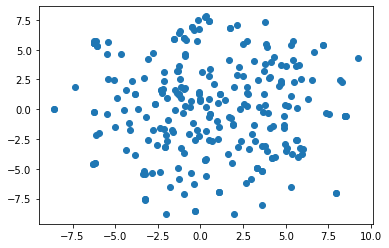

In [31]:
from sklearn.manifold import TSNE

#  TSNE(, perplexity=perplexity,
#                  method="barnes_hut", random_state=42, n_iter=n_iter)
tsne = TSNE(n_components=2, metric='precomputed')
distGraph = 1/(M+0.01)
X_2d = tsne.fit_transform(distGraph)
target_ids = range(2)

from matplotlib import pyplot as plt
# plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
# for i, c, label in zip(target_ids, colors, digits.target_names):
#     plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
# plt.legend()
plt.scatter(X_2d[:, 0], X_2d[:, 1],label=featureNames)
plt.show()                 

In [231]:
# plt.figure(figsize=(16, 5))
# plt.scatter(X_2d[:, 0], X_2d[:, 1])
# for i in range(10):
#     plt.scatter(X_2d[bf_plants[i], 0], X_2d[bf_plants[i], 1],label=plantNames[bf_plants[i]],c=colors[i])
# plt.legend()
# plt.show()                 
# m667
# np.arange(6)

In [119]:
plant_names_ac = ac_df['Speciea'].unique()
print(len(plant_names_ac))
df_ac = DataFrame(columns=plant_names_ac,index=np.arange(667))
for p_name in plant_names_ac:
    nan_list = list(np.full(667, np.nan))
    met_list = ac_df[ac_df['Speciea'] == p_name].Metabolit.values
    nan_list[:len(met_list)] = met_list
    df_ac[p_name] = nan_list
df_ac.iloc[:,[0,1,2,-3,-2,-1]].head(10)

3251


,Arabidopsis thaliana,Begonia nantoensis,Beta vulgaris,Vernonia lasiopus,Citrus paradisi x,Chrysosplenium grayanum
0,C00000113,C00000113,C00000113,C00051211,C00051328,C00051584
1,C00000152,C00000152,C00000152,NaN,NaN,NaN
2,C00000615,C00000615,C00002743,NaN,NaN,NaN
3,C00000911,C00003776,NaN,NaN,NaN,NaN
4,C00000982,NaN,NaN,NaN,NaN,NaN
5,C00002526,NaN,NaN,NaN,NaN,NaN
6,C00002743,NaN,NaN,NaN,NaN,NaN
7,C00003467,NaN,NaN,NaN,NaN,NaN
8,C00003661,NaN,NaN,NaN,NaN,NaN
9,C00003776,NaN,NaN,NaN,NaN,NaN


In [124]:
# ac_df.shape
from pandas import ExcelWriter
writer = ExcelWriter('data/AC_restructured.xlsx')
df_ac.to_excel(writer,'Sheet1')
writer.save()

In [204]:
# ac_df.groupby('Speciea').head()
# ac_df[ac_df['Speciea'] == 'Arabidopsis thaliana']
# len(np.unique(ac_df.index.values.tolist()))
# ac_df.head()
# for p_name in plant_names_ac:
#     print(ac_df[ac_df['Speciea'] == p_name].Metabolit.values)

                      met_count
Arabidopsis thaliana         14
Annona muricata              14
Morus alba                   13
Citrus spp.                  11
Citrus aurantium             11
1     1946
2      536
0      414
3      202
4       74
5       35
7       16
6       14
8        4
9        3
11       2
14       2
10       2
13       1
dtype: int64
[1946  536  414  202   74   35   16   14    4    3    2    2    2    1]
536
                      met_count
Arabidopsis thaliana         14
Annona muricata              14
Arabidopsis thaliana


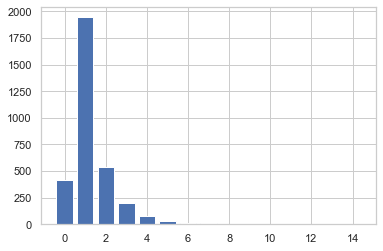

In [254]:
df_ac_interscted_met =  pd.DataFrame().reindex_like(df_ac)

df_ac_interscted_met =  pd.DataFrame().reindex_like(df_ac)
for col in df_ac:
    nan_list = list(np.full(df_ac.shape[0], np.nan))
    # print(df_ac[col])
    intersect = list(set(df_ac[col]) & met_set_403)
    nan_list[:len(intersect)] = intersect
    df_ac_interscted_met[col] = nan_list


df_ac_interscted_met.iloc[:,[0,1,2,-3,-2,-1]].head(10)

df_ac_interscted_met.count()
df_ac_interscted_met_count = DataFrame(df_ac_interscted_met.count(),columns =['met_count'])
df_ac_interscted_met_count
print(df_ac_interscted_met_count[df_ac_interscted_met_count['met_count']>10])

# نمایش نمودار فراوانی تعداد متابولیت های مشترک
ser = df_ac_interscted_met.count()
# ser.values
met_counts = ser.value_counts()
# .agg('sum')
# print(met_counts)
# print(met_counts.values)
# plt.bar(met_counts.index,met_counts.values)

len(df_ac_interscted_met_count['met_count'])
i=1
print(met_counts.values[i])
idx = df_ac_interscted_met_count[df_ac_interscted_met_count['met_count']==14]
print(idx)
name = idx.index.format()
print(name[0])#+"\n"+name[1])
# print(met_counts.sort_index(ascending=True).values)
# print(met_counts.sort_index(ascending=True).index.values)
met_counts_sorted_index = met_counts.sort_index(ascending=True).values
met_counts_sorted_vals = met_counts.sort_index(ascending=True).index.values
# met_counts_sorted = met_counts.sort_index(ascending=True)


9.6 10 2 10
10.6 11 2 11
11.6 12 1 13
12.6 13 2 14


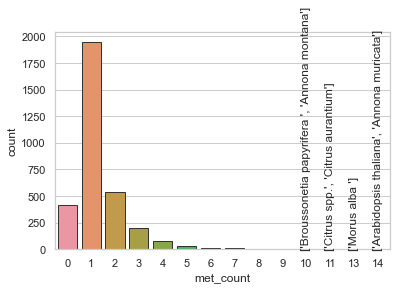

324


'C00003776'

In [255]:

import seaborn as sns
sns.set(style="whitegrid")#"darkgrid")
total = float(len(met_counts)) # one person per row 
ax = sns.countplot(x=df_ac_interscted_met_count['met_count'],\
                   edgecolor=".2",data=df_ac_interscted_met_count ) # for Seaborn version 0.7 and more
for i,p in enumerate(ax.patches):
    if(met_counts_sorted_index[i]<3):
        print(p.get_x(),i,met_counts_sorted_index[i],met_counts_sorted_vals[i])
        idx = df_ac_interscted_met_count[df_ac_interscted_met_count['met_count']==met_counts_sorted_vals[i]]
        name = idx.index.format()
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3, name,
            ha="center",rotation =90) 
plt.show()

# مشخص کردن گیاهانی که هیچ متابولیت مشترکی با لیست ۴۰۳ ندارند و  حذف آنها
null_cols = df_ac_interscted_met.columns[df_ac_interscted_met.isnull().all()]
# null_cols

df_ac_interscted_met.drop(null_cols, axis = 1, inplace = True)

# حذف سطرهای تمام نال
df_ac_interscted_met.dropna(how='all',axis=0,inplace=True)
# df_ac_interscted_met

numpy_matrix = df_ac_interscted_met.values
d =  numpy_matrix.transpose()
T = [[x for x in row if str(x) != 'nan'] for row in d]
# T = [[str(i)[3:] for i in row ] for row in d]
# T = [[int(i) for i in row if i != ''] for row in T]
# print(len(T))
# print(set(T[0][:20]) and m667 )
n_plants = len(T)
n_plants

# مشخص کردن تعداد متابولیت‌های مجزا
from itertools import chain
newlist = list(chain(*T))
print(len(np.unique(newlist)))
newlist[0]

In [259]:
print(met_counts.sort_index(ascending=True).values)
print(met_counts.sort_index(ascending=True).index.values)


[ 414 1946  536  202   74   35   14   16    4    3    2    2    1    2]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


In [250]:
df_ac_interscted_met_count['met_count']

Arabidopsis thaliana       14
Begonia nantoensis          4
Beta vulgaris               3
Cucumis sativus             5
Nicotiana tabacum           2
                           ..
Jungermannia sp.            0
Citrus tachibana            0
Vernonia lasiopus           1
Citrus paradisi x           0
Chrysosplenium grayanum     0
Name: met_count, Length: 3251, dtype: int64

9.6 10 2 10
10.6 11 2 11
11.6 12 1 13
12.6 13 2 14


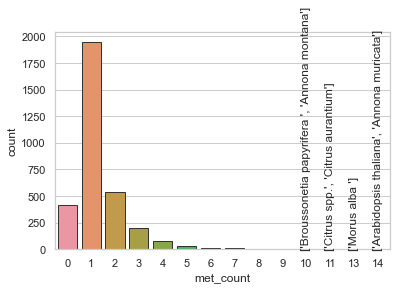

In [251]:
met_counts_sorted = met_counts.sort_index(ascending=True)
sns.set(style="whitegrid")#"darkgrid")
total = float(len(met_counts)) # one person per row 
ax = sns.countplot(x=df_ac_interscted_met_count['met_count'],\
                   edgecolor=".2",data=df_ac_interscted_met_count ) # for Seaborn version 0.7 and more
for i,p in enumerate(ax.patches):
    if(met_counts_sorted_index[i]<3):
        print(p.get_x(),i,met_counts_sorted_index[i],met_counts_sorted_vals[i])
        idx = df_ac_interscted_met_count[df_ac_interscted_met_count['met_count']==met_counts_sorted_vals[i]]
        name = idx.index.format()
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3, name,
            ha="center",rotation =90) 
plt.show()


In [252]:
ax.patches

In [18]:
import networkx as nx
G = nx.Graph(M)

In [19]:
print(nx.is_connected(G))
conComp = list(nx.connected_components(G))
print(len(conComp))

False
16


In [20]:
n_con_comp = [len(x) for x in conComp]
idx = np.argsort(n_con_comp)
maxIdx = idx[-1]
print(maxIdx,n_con_comp[maxIdx])
con_comp_indices = conComp[maxIdx]
# con_comp_indices

0 246


In [21]:
subG = G.subgraph(nodes=con_comp_indices)
# nx.draw_shell(subG)
# nx.draw_networkx(subG)

In [22]:
 len(subG.nodes())
 # از ۳۶۰ تا نود به ۲۴۶ تا رسید

246

In [23]:
def graph_features(G,normalize=True):
    df= pd.DataFrame(index = G.nodes())
    deg = G.degree()
    deg_list = np.zeros((len(deg)))
    for i,x in enumerate(G.degree()):
        deg_list[i] = x[1]

    df['degree'] = deg_list #pd.Series(deg_list)
    df['degree_cent'] = pd.Series(nx.degree_centrality(G))
    df['betweenness'] = pd.Series(nx.betweenness_centrality(G))
    df['closeness'] = pd.Series(nx.closeness_centrality(G))
    df['eccentricity'] = pd.Series(nx.eccentricity(G))
    df['eigenvector'] = pd.Series(nx.eigenvector_centrality(G))
    if(normalize):
        min_max_scaler = preprocessing.MinMaxScaler()
        numpy_matrix = df.values
        X = min_max_scaler.fit_transform(numpy_matrix)
        for i,col in enumerate(df.columns):
            df.loc[:, col] = X[:,i]

    return df

In [24]:
gf_df = graph_features(subG) # graph features data frame

# محاسبه مجموع ویژگی ها
features_sum = gf_df.sum(axis=1)
gf_df['features_sum'] = features_sum

gf_df

,degree,degree_cent,betweenness,closeness,eccentricity,eigenvector,features_sum
0,0.208633,0.208633,0.000000,0.525861,0.333333,0.226845,1.503306
1,0.208633,0.208633,0.000000,0.525861,0.333333,0.226845,1.503306
2,0.208633,0.208633,0.000000,0.525861,0.333333,0.226845,1.503306
3,0.071942,0.071942,0.000000,0.472791,0.333333,0.095236,1.045244
4,0.532374,0.532374,0.238197,0.725683,0.333333,0.677608,3.039569
...,...,...,...,...,...,...,...
256,0.035971,0.035971,0.000000,0.374106,0.333333,0.053391,0.832774
257,0.446043,0.446043,0.114803,0.708017,0.000000,0.523004,2.237910
258,0.115108,0.115108,0.000000,0.429901,0.333333,0.082352,1.075802
260,0.086331,0.086331,0.004764,0.424561,0.333333,0.106712,1.042032


In [25]:
# مرتب سازی بر حسب مجموع ویژگی ها
indices = gf_df['features_sum']#.argsort()#[::-1]
# print(indices.sort_values(ascending=False))
plants_numbers_desc = indices.sort_values(ascending=False).index
# print((plants_numbers_desc[:100].values))
plants_order_by_features = df_403p_interscted_met.keys()[plants_numbers_desc.values].values
print(len(plants_order_by_features))
# plantNames[plants_numbers_desc[:10].values]
# plantNames[plants_numbers_desc[:10].values]

246


In [26]:
# df[df.keys()[plants_numbers_desc[:10].values]]

In [27]:
# لیست اندیس گیاهانی که حذف شده اند
gf_df.index ^ df_403p.index
# قبلا ۲۶۷ تا حذف شده بودند

Int64Index([  8,  10,  31,  37,  58,  69,  76,  91,  93, 115,
            ...
            617, 618, 619, 620, 621, 622, 623, 624, 625, 626],
           dtype='int64', length=381)

In [28]:
# خواندن فایل AC

ac_df = pd.read_excel(r'data/AC complete network 27-06-98 .xlsx', engine="openpyxl")
ac_df = ac_df.drop(columns=['interaction'])
ac_df.head()

,Speciea,Metabolit
0,Arabidopsis thaliana,C00000113
1,Begonia nantoensis,C00000113
2,Beta vulgaris,C00000113
3,Cucumis sativus,C00000113
4,Nicotiana tabacum,C00000113


In [29]:
print(len(ac_df))
ac_df.dropna(inplace=True)
print(len(ac_df))

23540
5392


In [30]:
# ac_df.groupby('Speciea').count()
print(ac_df['Speciea'].isna())
print(len(ac_df['Speciea'].unique()))
print(len(ac_df['Speciea']))
print(ac_df.groupby('Speciea').count())
ac_df.groupby('Speciea').count().sort_values(by='Metabolit',ascending=False)

0       False
1       False
2       False
3       False
4       False
        ...  
5387    False
5388    False
5389    False
5390    False
5391    False
Name: Speciea, Length: 5392, dtype: bool
3251
5392
                      Metabolit
Speciea                        
Abelmoschus manihot           5
Abies alba                    2
Abies amabilis                3
Abies lasiocarpa              1
Abrus precatorius             1
...                         ...
Zinnia elegans                1
Ziziphora hispanica           1
Ziziphus cambodiana           1
Ziziphus jujuba               4
Zollernia paraensis           1

[3251 rows x 1 columns]


,Metabolit
Speciea,
Annona muricata,14
Arabidopsis thaliana,14
Citrus spp.,13
Morus alba,13
Citrus aurantium,11
...,...
Euphorbia paralias,1
Euphorbia peplus,1
Euphorbia portlandica,1


In [31]:
ac_df.groupby('Metabolit').count().sort_values(by='Speciea',ascending=False)

,Speciea
Metabolit,
C00002526,244
C00003749,204
C00005373,178
C00000615,159
C00003741,156
...,...
C00001158,1
C00001159,1
C00001160,1


In [32]:
# AC_plants_index_order_by_metabolit_numbers = ac_df.groupby('Speciea').count().sort_values(by='Metabolit',ascending=False)
# AC_plants_index_order_by_metabolit_numbers

In [33]:
AC_plants_order_by_metabolit_numbers = ac_df.groupby('Speciea').count().sort_values(by='Metabolit',ascending=False).index.values

In [34]:
intersect = set(AC_plants_order_by_metabolit_numbers) & set(plants_order_by_features)
print(len(intersect))
print(intersect)
print(type(AC_plants_order_by_metabolit_numbers))
print(AC_plants_order_by_metabolit_numbers.shape,plants_order_by_features.shape)

68
{'Datura stramonium', 'Annona squamosa', 'Citrus aurantium', 'Fagara tessmannii', 'Annona muricata', 'Daucus carota', 'Rosmarinus officinalis', 'Arabidopsis thaliana', 'Morinda parvifolia', 'Eucommia ulmoides', 'Hibiscus taiwanensis', 'Theobroma cacao', 'Trifolium repens', 'Citrus reticulata', 'Poncirus trifoliata', 'Oricia suaveolens', 'Cucumis sativus', 'Panax ginseng', 'Ardisia colorata', 'Vitis vinifera', 'Allium cepa', 'Plantago major', 'Piper cubeba', 'Mansonia gagei', 'Brassica oleracea', 'Acer rubrum', 'Nigella sativa', 'Tanacetum polycephalum', 'Berberis aquifolium', 'Momordica charantia', 'Manilkara zapota', 'Rubus idaeus', 'Juniperus phoenicea', 'Salvia officinalis', 'Salvia dominica', 'Phellodendron amurense', 'Punica granatum', 'Strychnos nux-vomica', 'Hypericum perforatum', 'Capsicum annuum', 'Porcelia macrocarpa', 'Eucalyptus camaldulensis', 'Garcinia mangostana', 'Artemisia annua', 'Crataegus pinnatifida', 'Aloe vera', 'Ziziphus jujuba', 'Perilla frutescens', 'Trifol

In [35]:
rt_df = pd.read_excel('data/RT-complete-network.xlsx', engine="openpyxl")
rt_df.drop(columns=['pm'],inplace=True)
rt_df.head()
RT_plants_order_by_metabolit_numbers = rt_df.groupby('Plant').count().sort_values(by='Metabolite',ascending=False).index.values

fim_df = pd.read_excel(r'results/bestPlants_min_freq_10.xlsx',header=None, engine="openpyxl") 

fim_w_df = pd.read_excel(r'results/bestPlants_min_freq_10_w.xlsx',header=None, engine="openpyxl") 


In [36]:
def compute_metrics(true_list,recom_list,apk_ranges = np.arange(1, 100,5),mapk_ranges = np.arange(1, 100,5)):
    apk = []
    for K in apk_ranges:
        apk.extend([ml_metrics.apk(true_list.tolist(), recom_list.tolist(), k=K)])
    mapk = []
    for K in mapk_ranges:
        mapk.extend([ml_metrics.mapk(true_list, recom_list, k=K)])
    mark = []
    for K in mapk_ranges:
        mark.extend([recmetrics.mark(true_list, recom_list, k=K)])
    return [apk,mapk,mark]

In [37]:
index = np.arange(1,100,5)

[apk_fim,mapk_fim,mark_fim] = compute_metrics(AC_plants_order_by_metabolit_numbers, fim_df[1].values)
# apk_fim
[apk_fim_w,mapk_fim_w,mark_fim_w] = compute_metrics(AC_plants_order_by_metabolit_numbers, fim_w_df[1].values)
[apk_gf,mapk_gf,mark_gf] = compute_metrics(AC_plants_order_by_metabolit_numbers, plants_order_by_features)
[apk_rt,mapk_rt,mark_rt] = compute_metrics(AC_plants_order_by_metabolit_numbers, RT_plants_order_by_metabolit_numbers)


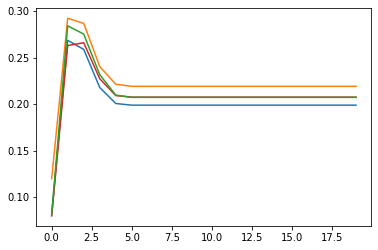

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(mapk_gf, color='tab:blue')
ax.plot(mapk_fim, color='tab:red')
ax.plot(mapk_fim_w, color='tab:orange')
ax.plot(mapk_rt, color='tab:green')

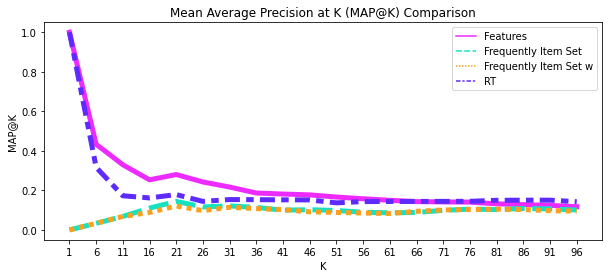

In [39]:
scores = [apk_gf,apk_fim, apk_fim_w, apk_rt]
# index = np.arange(1,100,5)
names = ['Features', 'Frequently Item Set','Frequently Item Set w', 'RT']

fig = plt.figure(figsize=(10, 4))
recmetrics.mapk_plot(scores, model_names=names, k_range=index)

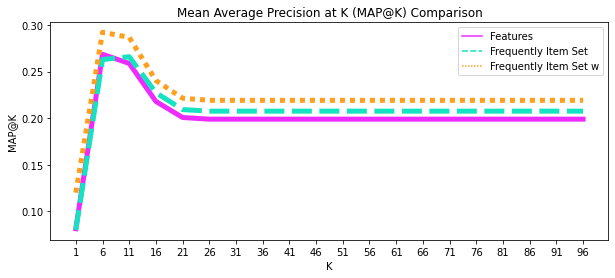

In [40]:
scores = [mapk_gf,mapk_fim, mapk_fim_w]#, mapk_rt]
names = ['Features', 'Frequently Item Set','Frequently Item Set w']#, 'RT']

fig = plt.figure(figsize=(10, 4))
recmetrics.mapk_plot(scores, model_names=names, k_range=index)

In [41]:
for i in range(len(mapk_fim)):
    print("{:2.3f}  {:2.3f}".format(apk_fim[i],mapk_fim[i]))

0.000  0.080
0.033  0.263
0.068  0.266
0.110  0.227
0.144  0.209
0.116  0.208
0.121  0.208
0.114  0.208
0.100  0.208
0.102  0.208
0.098  0.208
0.089  0.208
0.086  0.208
0.088  0.208
0.099  0.208
0.105  0.208
0.103  0.208
0.108  0.208
0.106  0.208
0.101  0.208


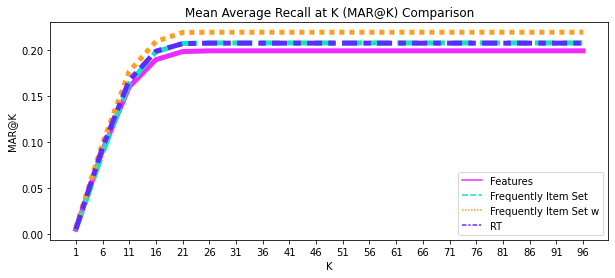

In [42]:
scores = [mark_gf,mark_fim, mark_fim_w, mark_rt]
# index = np.arange(1,100,5)
names = ['Features', 'Frequently Item Set','Frequently Item Set w', 'RT']

fig = plt.figure(figsize=(10, 4))
recmetrics.mark_plot(scores, model_names=names, k_range=index)

In [43]:
for i in range(10):#len(pred_mark_fim)):
    print("{:2.3f}  {:2.3f}".format(mark_fim[i],mark_rt[i]))
# [pred_mark_fim,pred_mark_rt]

0.004  0.005
0.087  0.094
0.163  0.167
0.198  0.199
0.207  0.207
0.208  0.207
0.208  0.207
0.208  0.207
0.208  0.207
0.208  0.207


In [44]:
[apk_fim_rev,mapk_fim_rev,mark_fim_rev] = compute_metrics(fim_df[1].values,AC_plants_order_by_metabolit_numbers)
# apk_fim
[apk_fim_w_rev,mapk_fim_w_rev,mark_fim_w_rev] = compute_metrics(fim_w_df[1].values,AC_plants_order_by_metabolit_numbers)
[apk_gf_rev,mapk_gf_rev,mark_gf_rev] = compute_metrics(plants_order_by_features,AC_plants_order_by_metabolit_numbers)
# [apk_rt_rev,mapk_rt_rev,mark_rt_rev] = compute_metrics(AC_plants_order_by_metabolit_numbers, 

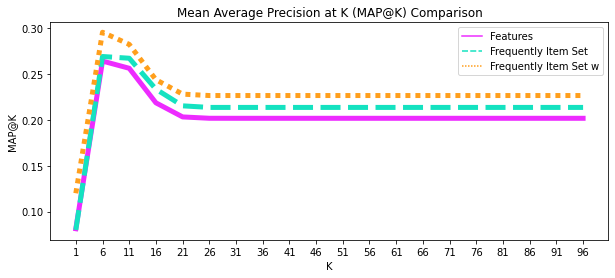

In [45]:
scores = [mapk_gf_rev,mapk_fim_rev, mapk_fim_w_rev]
# index = np.arange(1,30,2)
names = ['Features', 'Frequently Item Set','Frequently Item Set w']

fig = plt.figure(figsize=(10, 4))
recmetrics.mapk_plot(scores, model_names=names, k_range=index)